In [1]:
import pandas as pd
# 2. numpy : Python library hels accesss the mathematical functions ,etc.
import numpy as np
# 3. matplotlib : build upon the numpy module helps to plot various graphs
import matplotlib.pyplot as plt 
# 4. tensorflow : important module which helps to work with image data set also has keras to use layering properties
import tensorflow as tf
from tensorflow import keras
from keras import layers
from  keras import Sequential


In [5]:
#our data is in the form of folders ,in order to accesss the images using tensorfolw function we need folders path ,and that is done here
data_train_path =r'C:\Users\DHANSHRI\Desktop\Classification\PROJECT\output\train'
data_test_path=r'C:\Users\DHANSHRI\Desktop\Classification\PROJECT\output\test'
data_val_path=r'C:\Users\DHANSHRI\Desktop\Classification\PROJECT\output\val'


In [3]:
# pip install split-folders


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# import splitfolders
# splitfolders.ratio('train', output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 4438 files [00:51, 86.31 files/s] 


In [7]:
#setting image size
img_width=180
img_height=180

In [8]:
data_train= tf.keras.utils.image_dataset_from_directory(
    data_train_path,#path of folder
    shuffle=True,#its wike random state 
    image_size=(img_width,img_height),#image dimensions 
    batch_size=32,
    validation_split=False
)

Found 3516 files belonging to 85 classes.


In [9]:
data_val= tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False #we alreay have validation data set hence no need to split it again
)

Found 407 files belonging to 85 classes.


In [10]:
data_test= tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 515 files belonging to 85 classes.


In [12]:
data_cat=data_train.class_names

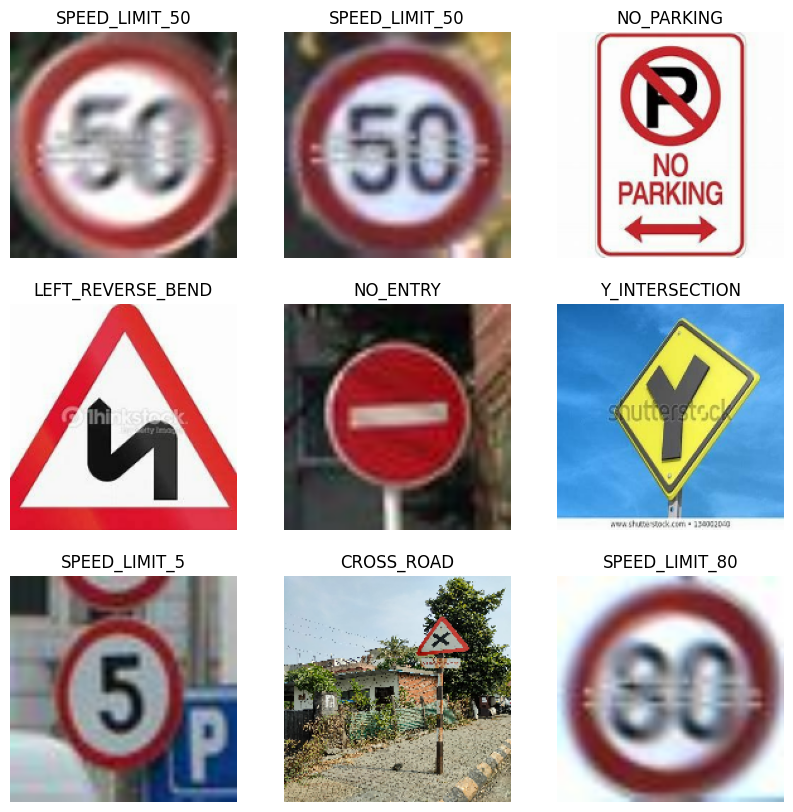

In [13]:
plt.figure(figsize=(10,10))
for image ,lables in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)#formation of grid  3*3 image matrix
        plt.imshow(image[i].numpy().astype('uint8'))#imshow helps to display images
        plt.title(data_cat[lables[i]])#fetching the titles from previously form lables list
        plt.axis('off')#hides the axix

In [14]:
data_train
#in the "<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>" 180 is height pixcels  180 is width pixcels and 3 suggests the Red Green Blue format of imgae

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
model= Sequential([
    layers.Rescaling(1./255),#getting color in the specified range
    layers.Conv2D(16,3,padding='same',activation='relu'),
    #will convert the (180,180,3)in single ,16 is number of neyrons in a layer
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))



])  

In [16]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [17]:
epochs_size=10
history= model.fit(data_train,validation_data=data_val,epochs=epochs_size,batch_size=32,verbose=1)

Epoch 1/10


110/110 [==============================] - 45s 366ms/step - loss: 2.7311 - accuracy: 0.3447 - val_loss: 1.6927 - val_accuracy: 0.5283
Epoch 2/10
110/110 [==============================] - 38s 332ms/step - loss: 1.1742 - accuracy: 0.6724 - val_loss: 1.0317 - val_accuracy: 0.7322
Epoch 3/10
110/110 [==============================] - 38s 333ms/step - loss: 0.5614 - accuracy: 0.8399 - val_loss: 1.0310 - val_accuracy: 0.7396
Epoch 4/10
110/110 [==============================] - 38s 331ms/step - loss: 0.2984 - accuracy: 0.9118 - val_loss: 1.0188 - val_accuracy: 0.7961
Epoch 5/10
110/110 [==============================] - 36s 309ms/step - loss: 0.1735 - accuracy: 0.9525 - val_loss: 1.1467 - val_accuracy: 0.7936
Epoch 6/10
110/110 [==============================] - 34s 302ms/step - loss: 0.1144 - accuracy: 0.9679 - val_loss: 1.0888 - val_accuracy: 0.7961
Epoch 7/10
110/110 [==============================] - 37s 322ms/step - loss: 0.0860 - accuracy: 0.9764 - val_loss: 1.0017 - val_

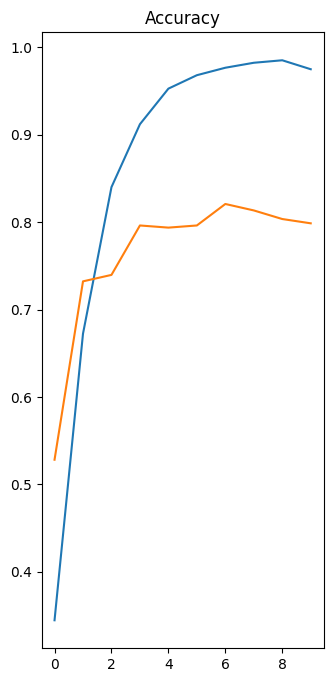

Text(0.5, 1.0, 'Loss')

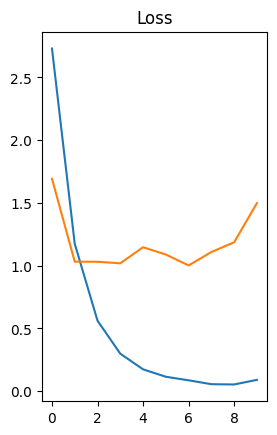

In [18]:
epochs_range =range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.show()

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation loss')
plt.title('Loss')


In [24]:
image = 'cattel.png.jpg'
image =tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [30]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 56ms/step


In [31]:
score=tf.nn.softmax(predict)

In [32]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is GAP_IN_MEDIAN with accuracy of 99.56
